<a href="https://colab.research.google.com/github/msimuko/code-unza25-csc4792-project_team_30/blob/main/code_unza25_csc4792_project_team_30_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3.2 References Publication Type Classification (CRISP-DM)
##Business understanding: Reference Classification Project

### Overview
Build a supervised classifier to assign publication types (journal, conference, report, thesis, book) from citation text and URLs.
Curate and label a training set from scraped references; ensure

### Business Understanding

### Problem Statement  
Managing and organizing academic references is a time-consuming process for students, researchers, and librarians. Manually categorizing references into types such as journal articles, books, theses, conference papers, reports, and web resources is error-prone and inconsistent, especially when dealing with large bibliographies. This lack of automation reduces productivity and creates difficulties in maintaining standardized reference databases at the University of Zambia.  

---

## Business Objectives  
The project seeks to automate the classification of academic references into their correct publication types.  

**Practical Success means:**  
- Students and researchers spend less time categorizing references manually.  
- Librarians can easily maintain structured institutional repositories.  
- The system provides fast, accurate, and consistent classification regardless of reference style (APA, IEEE, etc.).  
---

### Data Mining Goals

#### To achieve these objectives, we will:
Build a supervised classification model that can categorize references into publication types (e.g., journal, book, conference, report, thesis).
*   Explore natural language processing (NLP) techniques (such as text embeddings or feature extraction from citation strings).
*   Evaluate multiple classification algorithms (e.g., Logistic Regression, Random Forest, SVM, or deep learning models) to determine the best-performing approach.
---

## Initial Project Success Criteria  
- **Technical Success:**  
  - The model should achieve at least **80% classification accuracy** on test data.  


## Publication Types
The model classifies references into the following categories:
- **Journal Articles**: Peer-reviewed academic papers
- **Books**: Monographs and edited volumes
- **Thesis/Dissertations**: Graduate research works
- **Conference Papers**: Proceedings and presentations
- **Technical Reports / Reports**: Government and institutional publications
- **Web Resources**: Online publications and documents


## Key Features
- **Scalable Pipeline**: Easy to retrain with new data
- **Performance Analysis**: Comprehensive evaluation metrics
- **Extensible Design**: Simple to add new publication types



## Data Understanding

The dataset for this project is located in `references_classification_metadata.csv` and consists of academic references from the UNZA Institutional Repository. Each entry includes:
- `reference_text`: The full bibliographic reference as a string.
- `publication_type`: The manually assigned category label (e.g., Journal Article, Book, Thesis, Conference Paper, Report, Web Resource).

**Observations:**
- The dataset is small and imbalanced, with some classes represented by only one sample.
- Reference texts vary in length and format, reflecting real-world diversity.
- No duplicate entries or obvious data quality issues were found.
- Text preprocessing (see `src/utils.py`) is used to standardize and clean reference strings before modeling.

**Implications for Modeling:**
- The limited and imbalanced data may affect model generalization and accuracy.
- Stratified train-test splitting may not be possible for all classes; random splitting is used when necessary.
- Additional data collection is recommended for improved performance and robustness.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####Step 1: references.csv data extraction from unza institutional repository into references.csv



In [ ]:
!pip install requests pandas pymupdf
!pip install tools
!pip install pdfplumber    # Recommended
!pip install pypdf
!pip install requests
!pip install beautifulsoup4
!pip install lxml
!pip install pdfplumber
!pip install pypdf
!pip install PyMuPDF
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.8 MB/s eta 0:00:00


🔎 Scraping thesis


/tmp/ipython-input-3002736365.py:44: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  match = soup.find(text=regex)


🔎 Scraping conference
🔎 Scraping report
🔎 Scraping journal
✅ Saved 45 references with classification metadata to:
/content/drive/MyDrive/misc-unza25-csc4792-project_team30/references_classification_metadata.csv


####Step 2: Data  understanding and exploration and visualization




FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/db-unza25-csc4792-datasets-dspace_unza_zm.csv'

## 3. Data Preparation

In this step, we cleaned and transformed our raw extracted data to prepare it for modeling.

### Data Cleaning
- Removed rows with failed/empty PDF extractions.
- Dropped duplicates and extremely short texts (<50 characters).
- Normalized whitespace and casing.

### Feature Engineering
- Added text length and word count features to help analyze reference complexity.

### Data Transformation
- Preprocessed text (lowercase, punctuation removal).
- Standardized `publication_type` categories based on the source URL (journal, thesis, conference, report, other).
- Created a new `cleaned_text` column for training.


In [ ]:
# ==========================
# Data Preparation — clean, split, vectorize, save
# ==========================

import os
import pandas as pd
import re, string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# (Optional) Mount Google Drive if running in Colab
try:
    from google.colab import drive  # type: ignore
    drive.mount('/content/drive')
except Exception:
    pass

# --------------------------
# Load from the exact saved path
# --------------------------
input_path = "/content/drive/MyDrive/misc-unza25-csc4792-project_team30/references_classification_metadata.csv"
df = pd.read_csv(input_path)
print(f"✅ Loaded {len(df)} rows from {input_path}")
print("Columns:", df.columns.tolist())

# --------------------------
# Ensure required columns
# --------------------------
required = {'title', 'publication_type'}
missing = required - set(df.columns)
if missing:
    raise KeyError(
        f"❌ Missing required columns: {', '.join(sorted(missing))}. "
        f"Found columns: {list(df.columns)}"
    )

# Rename "title" -> "reference_text" for consistency
df = df.rename(columns={'title': 'reference_text'})

# --------------------------
# Cleaning function
# --------------------------
def clean_reference(text: str) -> str:
    if pd.isna(text):
        return ''
    t = str(text).lower()
    t = re.sub(f"[{re.escape(string.punctuation)}]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

# Apply cleaning
df['cleaned_text'] = df['reference_text'].astype(str).apply(clean_reference)

# --------------------------
# Save cleaned CSV (in same misc folder)
# --------------------------
output_path = "/content/drive/MyDrive/misc-unza25-csc4792-project_team30/references_cleaned.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print(f"✅ Saved cleaned dataset to:\n{output_path}")

# --------------------------
# Features and labels
# --------------------------
X = df['cleaned_text'].values
y = df['publication_type'].values

# --------------------------
# Stratify check
# --------------------------
value_counts = pd.Series(y).value_counts()
can_stratify = (value_counts >= 2).all() and len(value_counts) > 1
strat = y if can_stratify else None

# --------------------------
# Train-validation split
# --------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=strat
)

# --------------------------
# TF-IDF Vectorization
# --------------------------
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=10000,
    min_df=1
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Output shapes
print("Train shape:", X_train_tfidf.shape)
print("Validation shape:", X_val_tfidf.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded 45 rows from /content/drive/MyDrive/misc-unza25-csc4792-project_team30/references_classification_metadata.csv
Columns: ['title', 'publication_type', 'pdf_url']
✅ Saved cleaned dataset to:
/content/drive/MyDrive/misc-unza25-csc4792-project_team30/references_cleaned.csv
Train shape: (36, 494)
Validation shape: (9, 494)


In [ ]:
# Data Preparation — clean text, split, vectorize (strict)

import os
import pandas as pd
import re, string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# (Optional) Mount Google Drive if running in Colab
try:
    from google.colab import drive  # type: ignore
    drive.mount('/content/drive')
except Exception:
    pass

# Ensure df is loaded; if not, load from the correct path your scraper writes to
if 'df' not in globals():
    input_path = "/content/drive/MyDrive/misc-unza25-csc4792-project_team30/references_classification_metadata.csv"
    if not os.path.exists(input_path):
        raise FileNotFoundError(f"CSV not found at: {input_path}. Make sure Drive is mounted and the scraper saved there.")
    df = pd.read_csv(input_path)
    print(f"✅ Loaded {len(df)} rows from {input_path}")
    print("Columns:", df.columns.tolist())

# Ensure required columns; rename title -> reference_text if needed
if 'reference_text' not in df.columns and 'title' in df.columns:
    df = df.rename(columns={'title': 'reference_text'})

required = {'reference_text', 'publication_type'}
missing = required - set(df.columns)
if missing:
    raise KeyError(
        "Data Preparation requires columns: reference_text, publication_type. Missing: " +
        ", ".join(sorted(missing)) + f". Found: {list(df.columns)}"
    )

def clean_reference(text: str) -> str:
    if pd.isna(text):
        return ''
    t = str(text).lower()
    t = re.sub(f'[{re.escape(string.punctuation)}]', ' ', t)
    t = re.sub(r'\s+', ' ', t).strip()
    return t

# Create cleaned text
df['cleaned_text'] = df['reference_text'].astype(str).apply(clean_reference)
X = df['cleaned_text'].values
y = df['publication_type'].values

# Stratify only if every class has at least 2 samples and there is >1 class
value_counts = pd.Series(y).value_counts()
can_stratify = (value_counts >= 2).all() and len(value_counts) > 1
strat = y if can_stratify else None

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=strat
)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=1)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

print("Stratify used:", strat is not None)
print("Class distribution:\n", value_counts.to_string())
print("Train shape:", X_train_tfidf.shape)
print("Validation shape:", X_val_tfidf.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Stratify used: True
Class distribution:
 conference    25
thesis        10
journal        6
report         4
Train shape: (36, 494)
Validation shape: (9, 494)


In [ ]:
import pandas as pd
import numpy as np
import re, string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix

# -----------------------------
# Detect all columns
# -----------------------------
all_columns = df.columns.tolist()

# Identify textual columns (object dtype), exclude label; ensure 'reference_text' if present
text_fields = [c for c in all_columns if c != 'publication_type' and df[c].dtype == 'object']
if 'reference_text' in all_columns and 'reference_text' not in text_fields:
    text_fields.insert(0, 'reference_text')
# Fallback: if no text fields detected, default to 'reference_text' if available
if not text_fields and 'reference_text' in all_columns:
    text_fields = ['reference_text']

# Identify numeric columns robustly
numeric_fields = [c for c in all_columns if c not in text_fields and np.issubdtype(df[c].dtype, np.number)]
if 'year' in all_columns and 'year' not in numeric_fields:
    numeric_fields.append('year')

# -----------------------------
# Clean and normalize text fields
# -----------------------------
punct_class = re.escape(string.punctuation)
def clean_text(text: str) -> str:
    if pd.isna(text):
        return ''
    t = str(text).lower()
    t = re.sub(f'[{punct_class}]', ' ', t)
    t = re.sub(r'\s+', ' ', t).strip()
    return t

for col in text_fields:
    df[f'cleaned_{col}'] = df[col].apply(clean_text)

# -----------------------------
# Combine all text fields
# -----------------------------
clean_cols = [f'cleaned_{c}' for c in text_fields]
df['combined_text'] = df[clean_cols].agg(' '.join, axis=1)

# -----------------------------
# Derive boolean features dynamically from text fields
# -----------------------------
def contains_pattern(s, pattern):
    return int(bool(re.search(pattern, s)))

df['has_doi'] = df['combined_text'].apply(lambda s: contains_pattern(s, r'doi\s*:\s*|10\.\d{4,9}/'))
df['has_url'] = df['combined_text'].apply(lambda s: contains_pattern(s, r'http://|https://|www\.'))
df['has_isbn'] = df['combined_text'].apply(lambda s: contains_pattern(s, r'\bisbn\b'))
df['has_volume_issue'] = df['combined_text'].apply(lambda s: contains_pattern(s, r'\b(vol|volume|issue)\b'))
df['has_proceedings'] = df['combined_text'].apply(lambda s: contains_pattern(s, r'\b(proceedings|conference|symposium|workshop)\b'))

numeric_fields += ['has_doi','has_url','has_isbn','has_volume_issue','has_proceedings']

# -----------------------------
# Train/Validation split (by index to keep alignment)
# -----------------------------
y = df['publication_type'].values
X_text_series = df['combined_text']

value_counts = pd.Series(y).value_counts()
can_stratify = (value_counts >= 2).all() and len(value_counts) > 1
strat = y if can_stratify else None

idx = df.index.to_numpy()
train_idx, val_idx = train_test_split(idx, test_size=0.2, random_state=42, stratify=strat)

# -----------------------------
# TF-IDF Vectorization
# -----------------------------
X_train_text = X_text_series.loc[train_idx].values
X_val_text = X_text_series.loc[val_idx].values

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000, min_df=1)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_val_tfidf = vectorizer.transform(X_val_text)

# -----------------------------
# Standardize numeric features (fit on train, transform val)
# -----------------------------
X_num = df[numeric_fields].copy().apply(pd.to_numeric, errors='coerce').fillna(0.0)
scaler = StandardScaler()
X_train_num_std = scaler.fit_transform(X_num.loc[train_idx])
X_val_num_std = scaler.transform(X_num.loc[val_idx])

# -----------------------------
# Combine text and numeric features (sparse)
# -----------------------------
X_train_final = hstack([X_train_tfidf, csr_matrix(X_train_num_std)])
X_val_final = hstack([X_val_tfidf, csr_matrix(X_val_num_std)])
y_train = df.loc[train_idx, 'publication_type'].values
y_val = df.loc[val_idx, 'publication_type'].values

print(f"✅ X_train shape: {X_train_final.shape}, X_val shape: {X_val_final.shape}")
print(f"Text fields used: {text_fields}")
print(f"Numeric/boolean fields used: {numeric_fields}")
print("Class distribution:\n", value_counts.to_string())
print("Stratify used:", strat is not None)

✅ X_train shape: (36, 768), X_val shape: (9, 768)
Text fields used: ['reference_text', 'pdf_url', 'cleaned_text']
Numeric/boolean fields used: ['has_doi', 'has_url', 'has_isbn', 'has_volume_issue', 'has_proceedings']
Class distribution:
 conference    25
thesis        10
journal        6
report         4
Stratify used: True


# Step 3: Data Transformation

In [ ]:
import os
import re, string
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix

# -----------------------------
# Guard & Required Columns
# -----------------------------
if 'df' not in globals():
    raise NameError("DataFrame 'df' is not defined. Load the CSV first.")

required = {'reference_text', 'publication_type'}
missing = required - set(df.columns)
if missing:
    raise KeyError("Missing required columns: " + ", ".join(sorted(missing)))

# -----------------------------
# 1) Basic cleaning & deduplication
# -----------------------------
pre_dp_rows = len(df)
df = df.dropna(subset=required).copy()
df = df[(df['reference_text'].str.len() > 0) & (df['publication_type'].str.len() > 0)]
df['publication_type'] = df['publication_type'].str.lower()
before_dups = len(df)
df = df.drop_duplicates(subset=['reference_text', 'publication_type']).reset_index(drop=True)
dropped_dups = before_dups - len(df)

# -----------------------------
# 2) Detect text & numeric fields dynamically
# -----------------------------
all_columns = df.columns.tolist()
# Text fields (object dtype), exclude label and year; ensure reference_text included
text_fields = [c for c in all_columns if c not in ['publication_type', 'year'] and df[c].dtype == 'object']
if 'reference_text' in all_columns and 'reference_text' not in text_fields:
    text_fields.insert(0, 'reference_text')
if not text_fields and 'reference_text' in all_columns:
    text_fields = ['reference_text']

# Numeric fields (robust)
numeric_fields = [c for c in all_columns if c not in text_fields and np.issubdtype(df[c].dtype, np.number)]
if 'year' in all_columns and 'year' not in numeric_fields:
    numeric_fields.append('year')

# -----------------------------
# 3) Clean text fields
# -----------------------------
punct_class = re.escape(string.punctuation)
def clean_text(text_val: str) -> str:
    if pd.isna(text_val):
        return ''
    t = str(text_val).lower()
    t = re.sub(f'[{punct_class}]', ' ', t)
    t = re.sub(r'\s+', ' ', t).strip()
    return t

for col in text_fields:
    df[f'cleaned_{col}'] = df[col].apply(clean_text)

# Combine all text
clean_cols = [f'cleaned_{c}' for c in text_fields]
df['combined_text'] = df[clean_cols].agg(' '.join, axis=1)

# -----------------------------
# 4) Feature engineering (lengths, ratios, flags)
# -----------------------------
df['char_len'] = df['combined_text'].str.len()
df['word_len'] = df['combined_text'].str.split().apply(len)
df['digit_ratio'] = df['combined_text'].apply(lambda s: sum(ch.isdigit() for ch in s) / max(len(s), 1))
df['has_url'] = df['combined_text'].str.contains(r"http://|https://|www\.", regex=True).astype(int)
df['has_isbn'] = df['combined_text'].str.contains(r"\bisbn\b", regex=True).astype(int)
df['has_doi'] = df['combined_text'].str.contains(r"doi\s*:\s*|10\.\d{4,9}/", regex=True).astype(int)
df['has_volume_issue'] = df['combined_text'].str.contains(r"\b(vol|volume|issue)\b", regex=True).astype(int)
df['has_proceedings'] = df['combined_text'].str.contains(r"\b(proceedings|conference|symposium|workshop)\b", regex=True).astype(int)

match_year = df['combined_text'].str.extract(r"\b(19\d{2}|20\d{2})\b", expand=False)
df['year'] = pd.to_numeric(match_year, errors='coerce')

# -----------------------------
# 5) Optional integration with supplemental CSVs
# -----------------------------
integration_info = {'merged': False, 'files': [], 'key': 'cleaned_text_norm'}
def norm_key(s: str) -> str:
    return re.sub(r'\s+', ' ', re.sub(f'[{punct_class}]', ' ', str(s).lower())).strip()

df['cleaned_text_norm'] = df['combined_text'].apply(norm_key)
df_merged = df.copy()

try:
    project_dir  # must be defined by caller to enable this integration
    supplemental_files = ['supplement.csv', 'metadata.csv']
    to_merge = []
    for fname in supplemental_files:
        fpath = os.path.join(project_dir, fname)
        if os.path.exists(fpath):
            sup = pd.read_csv(fpath)
            keep_cols = [c for c in sup.columns if c not in ['reference_text', 'publication_type']]
            if 'cleaned_text' in sup.columns and 'cleaned_text_norm' not in sup.columns:
                sup['cleaned_text_norm'] = sup['cleaned_text'].apply(norm_key)
            elif 'reference_text' in sup.columns and 'cleaned_text_norm' not in sup.columns:
                sup['cleaned_text_norm'] = sup['reference_text'].apply(norm_key)
            if 'cleaned_text_norm' in sup.columns:
                to_merge.append(sup[['cleaned_text_norm'] + keep_cols])
                integration_info['files'].append(fname)
    for sup in to_merge:
        df_merged = df_merged.merge(sup, on='cleaned_text_norm', how='left')
    if to_merge:
        integration_info['merged'] = True
except Exception as e:
    integration_info['error'] = str(e)

# -----------------------------
# 6) Finalize numeric feature list (after merges)
# -----------------------------
numeric_features = list({
    *[c for c in df_merged.columns if c in numeric_fields],
    'char_len', 'word_len', 'digit_ratio',
    'has_url', 'has_isbn', 'has_doi', 'has_volume_issue', 'has_proceedings',
    'year'
})

# -----------------------------
# 7) Train/Validation split (by index for alignment)
# -----------------------------
y = df_merged['publication_type'].values
X_text_series = df_merged['combined_text']

value_counts = pd.Series(y).value_counts()
can_stratify = (value_counts >= 2).all() and len(value_counts) > 1
strat = y if can_stratify else None

idx = df_merged.index.to_numpy()
train_idx, val_idx = train_test_split(idx, test_size=0.2, random_state=42, stratify=strat)

# -----------------------------
# 8) TF-IDF vectorization
# -----------------------------
X_train_text = X_text_series.loc[train_idx].values
X_val_text = X_text_series.loc[val_idx].values

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=1)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_val_tfidf = vectorizer.transform(X_val_text)

# -----------------------------
# 9) Standardize numeric features (fit on train, transform val)
# -----------------------------
X_num_full = df_merged[numeric_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
scaler = StandardScaler()
X_train_num_std = scaler.fit_transform(X_num_full.loc[train_idx])
X_val_num_std = scaler.transform(X_num_full.loc[val_idx])

# -----------------------------
# 10) Combine text + numeric features (sparse)
# -----------------------------
X_train_final = hstack([X_train_tfidf, csr_matrix(X_train_num_std)])
X_val_final = hstack([X_val_tfidf, csr_matrix(X_val_num_std)])
y_train = df_merged.loc[train_idx, 'publication_type'].values
y_val = df_merged.loc[val_idx, 'publication_type'].values

# -----------------------------
# 11) Preprocessing report
# -----------------------------
preprocessing_report = {
    'initial_rows': int(pre_dp_rows),
    'rows_after_required': int(len(df)),
    'duplicates_removed': int(dropped_dups),
    'final_rows': int(len(df_merged)),
    'class_balance': {str(k): int(v) for k, v in value_counts.to_dict().items()},
    'can_stratify': bool(can_stratify),
    'numeric_features': numeric_features,
    'text_fields': text_fields,
    'integration': integration_info,
}

print(f"✅ X_train shape: {X_train_final.shape}, X_val shape: {X_val_final.shape}")
print(f"Text fields used: {text_fields}")
print(f"Numeric/boolean fields used: {numeric_features}")
preprocessing_report

✅ X_train shape: (35, 802), X_val shape: (9, 802)
Text fields used: ['reference_text', 'pdf_url', 'cleaned_text', 'cleaned_reference_text', 'cleaned_pdf_url', 'cleaned_cleaned_text', 'combined_text']
Numeric/boolean fields used: ['has_isbn', 'digit_ratio', 'year', 'has_volume_issue', 'word_len', 'has_proceedings', 'has_doi', 'char_len', 'has_url']


/tmp/ipython-input-1792624584.py:77: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['has_volume_issue'] = df['combined_text'].str.contains(r"\b(vol|volume|issue)\b", regex=True).astype(int)
/tmp/ipython-input-1792624584.py:78: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['has_proceedings'] = df['combined_text'].str.contains(r"\b(proceedings|conference|symposium|workshop)\b", regex=True).astype(int)


{'initial_rows': 45,
 'rows_after_required': 44,
 'duplicates_removed': 1,
 'final_rows': 44,
 'class_balance': {'conference': 24, 'thesis': 10, 'journal': 6, 'report': 4},
 'can_stratify': True,
 'numeric_features': ['has_isbn',
  'digit_ratio',
  'year',
  'has_volume_issue',
  'word_len',
  'has_proceedings',
  'has_doi',
  'char_len',
  'has_url'],
 'text_fields': ['reference_text',
  'pdf_url',
  'cleaned_text',
  'cleaned_reference_text',
  'cleaned_pdf_url',
  'cleaned_cleaned_text',
  'combined_text'],
 'integration': {'merged': False, 'files': [], 'key': 'cleaned_text_norm'}}

### Step 4: Data Transformation

In [ ]:
# 3b) Data Transformation — clean text then SAVE to project_dir/data/references_cleaned.csv
import os, re
import pandas as pd

# -----------------------------
# Guard: require df prepared earlier
# -----------------------------
if 'df' not in globals():
    raise NameError("DataFrame 'df' is not defined. Run Data Understanding and Data Preparation first.")

# -----------------------------
# 1) Basic, auditable clean (distinct from DP-cleaned_text)
# -----------------------------
def clean_text_basic(text: str) -> str:
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply to all textual fields if they exist
text_fields = [c for c in df.columns if df[c].dtype == 'object' and c != 'publication_type']
for col in text_fields:
    df[f'cleaned_basic_{col}'] = df[col].apply(clean_text_basic)

# -----------------------------
# 2) Optional mapping from pdf_url if present
# -----------------------------
def map_pub_type(url: str) -> str:
    url = str(url).lower()
    if 'journal' in url: return 'journal'
    if 'conference' in url: return 'conference'
    if ('thesis' in url) or ('theses' in url): return 'thesis'
    if ('report' in url) or ('technical-report' in url): return 'report'
    return 'other'

if 'pdf_url' in df.columns:
    df['publication_type_mapped'] = df['pdf_url'].apply(map_pub_type)
    print("Distribution after mapping from pdf_url:")
    print(df['publication_type_mapped'].value_counts())
else:
    print("No 'pdf_url' column present; skipping publication_type mapping.")

# -----------------------------
# 3) Resolve Drive project folder STRICTLY → save only under that folder
# -----------------------------
save_root = None
if 'project_dir' in globals() and isinstance(project_dir, str) and os.path.isdir(project_dir):
    save_root = project_dir
elif 'DATA_PATH' in globals() and DATA_PATH:
    cand = os.path.dirname(DATA_PATH)
    if os.path.isdir(cand):
        save_root = cand
# Fallbacks (Colab Drive first, then local workspace)
if save_root is None:
    for cand in [
        "/content/drive/MyDrive/misc-unza25-csc4792-project_team30",
        os.path.expanduser("~/Desktop/referene classifier")
    ]:
        if os.path.isdir(cand):
            save_root = cand
            break

if save_root is None:
    raise RuntimeError(
        "Could not resolve the Drive project folder (project_dir/DATA_PATH). "
        "Ensure the DU cell ran and Drive is mounted."
    )

print("Saving under project folder:", os.path.abspath(save_root))

# -----------------------------
# 4) Save to data/references_cleaned.csv ONLY (deterministic)
# -----------------------------
out_dir = os.path.join(save_root, 'data')
os.makedirs(out_dir, exist_ok=True)

out_path = os.path.join(out_dir, 'references_cleaned.csv')
df.to_csv(out_path, index=False)
print("Saved cleaned and transformed references to:", out_path)

# -----------------------------
# 5) Verify existence and size; list data/ contents
# -----------------------------
exists = os.path.exists(out_path)
size = os.path.getsize(out_path) if exists else 0
print(f"Verify: exists={exists}, size={size} bytes")

try:
    print("\nContents of data/ folder:")
    for name in sorted(os.listdir(out_dir)):
        print(" ", name)
except Exception as e:
    print("Could not list data/ folder:", e)

# -----------------------------
# 6) Return the single save path for convenience
# -----------------------------
out_path

Distribution after mapping from pdf_url:
publication_type_mapped
other     41
report     3
Name: count, dtype: int64
Saving under project folder: /content/drive/MyDrive/misc-unza25-csc4792-project_team30
Saved cleaned and transformed references to: /content/drive/MyDrive/misc-unza25-csc4792-project_team30/data/references_cleaned.csv
Verify: exists=True, size=241860 bytes

Contents of data/ folder:
  model_comparison.csv
  model_evaluation_summary.csv
  references_cleaned.csv


'/content/drive/MyDrive/misc-unza25-csc4792-project_team30/data/references_cleaned.csv'

# MODELING


In [ ]:
! ls

drive  sample_data


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

var_dataset_path = "/content/drive/MyDrive/misc-unza25-csc4792-project_team30/db-unza25-csc4792-datasets-dspace_unza_zm.csv"
var_dataset = pd.read_csv(var_dataset_path, sep="|")
df = var_dataset.copy()

In [24]:
# =============================
# Cell 1 — Prepare data, split, vectorize, calibrate SVM (robust)
# =============================
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# --- load df if not already in workspace ---
project_dir = "/content/drive/MyDrive/misc-unza25-csc4792-project_team30"
csv_path = os.path.join(project_dir, "db-unza25-csc4792-datasets-dspace_unza_zm.csv")
if 'df' not in globals():
    df = pd.read_csv(csv_path, delimiter="|")
    print("Loaded:", csv_path)

# --- build X and y robustly (accepts either schema) ---
if 'reference_text' in df.columns and 'publication_type' in df.columns:
    X = df['reference_text'].astype(str)
    y = df['publication_type'].astype(str)
else:
    # fallback to title + description -> target 'type'
    title = df['title'] if 'title' in df.columns else pd.Series('', index=df.index)
    desc  = df['description'] if 'description' in df.columns else pd.Series('', index=df.index)
    X = (title.fillna('') + " " + desc.fillna('')).str.strip().astype(str)
    if 'type' in df.columns:
        y = df['type'].astype(str)
    else:
        raise KeyError("No recognizable target column found (expected 'type' or 'publication_type').")

# --- group very rare classes into "Other" (so stratify and calibration are safe) ---
min_count = 2
counts = y.value_counts()
y = y.apply(lambda c: c if counts.get(c,0) >= min_count else "Other")

# --- train/test split (stratified, safe now) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# --- vectorize ---
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

print("Prepared X,y shapes:", X_train_vec.shape, X_test_vec.shape)
print("Class distribution (train):\n", y_train.value_counts())


Prepared X,y shapes: (1600, 5000) (400, 5000)
Class distribution (train):
 type
Thesis              1128
Other                295
Article              133
nan                   21
Book                  10
Technical Report       4
Recording, oral        3
Working Paper          2
Book chapter           2
Presentation           2
Name: count, dtype: int64


In [25]:
# =============================
# Cell 2 — Train classifiers (calibrated SVM done robustly across sklearn versions)
# =============================
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings("ignore")

trained_models = {}

# --- 1) Train base SVM first (we will calibrate it with cv="prefit") ---
print("Training base LinearSVC (will be calibrated)...", end=" ")
base_svm = LinearSVC(random_state=42, max_iter=5000)
base_svm.fit(X_train_vec, y_train)
print("done")

# --- 2) Instantiate CalibratedClassifierCV robustly (estimator= or base_estimator=) ---
try:
    # newer sklearns expect 'estimator'
    svm_clf = CalibratedClassifierCV(estimator=base_svm, cv="prefit")
except TypeError:
    # older sklearns expect 'base_estimator'
    svm_clf = CalibratedClassifierCV(base_estimator=base_svm, cv="prefit")

# Fit the calibrator on the (prefit) training data.
# NOTE: calibrating on the same training data is acceptable here to avoid cv-fold errors when classes are small.
svm_clf.fit(X_train_vec, y_train)
trained_models["SVM (calibrated)"] = svm_clf
print("Calibrated SVM ready.")

# --- 3) Other classifiers (train normally on X_train_vec) ---
models_plain = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000, n_jobs=-1, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

for name, clf in models_plain.items():
    print(f"Training {name} ...", end=" ")
    clf.fit(X_train_vec, y_train)
    trained_models[name] = clf
    print("done")

print("\nAll classifiers trained:", list(trained_models.keys()))


Training base LinearSVC (will be calibrated)... done
Calibrated SVM ready.
Training Naive Bayes ... done
Training Logistic Regression ... done
Training Random Forest ... done

All classifiers trained: ['SVM (calibrated)', 'Naive Bayes', 'Logistic Regression', 'Random Forest']



===== SVM (calibrated) =====
Accuracy: 0.8350 | F1-weighted: 0.8201
                  precision    recall  f1-score   support

         Article     0.8889    0.4848    0.6275        33
            Book     0.0000    0.0000    0.0000         2
           Other     0.7759    0.6081    0.6818        74
    Presentation     0.0000    0.0000    0.0000         1
 Recording, oral     1.0000    1.0000    1.0000         1
Technical Report     0.0000    0.0000    0.0000         1
          Thesis     0.8459    0.9539    0.8967       282
   Working Paper     0.0000    0.0000    0.0000         1
             nan     0.6000    0.6000    0.6000         5

        accuracy                         0.8350       400
       macro avg     0.4567    0.4052    0.4229       400
    weighted avg     0.8232    0.8350    0.8201       400



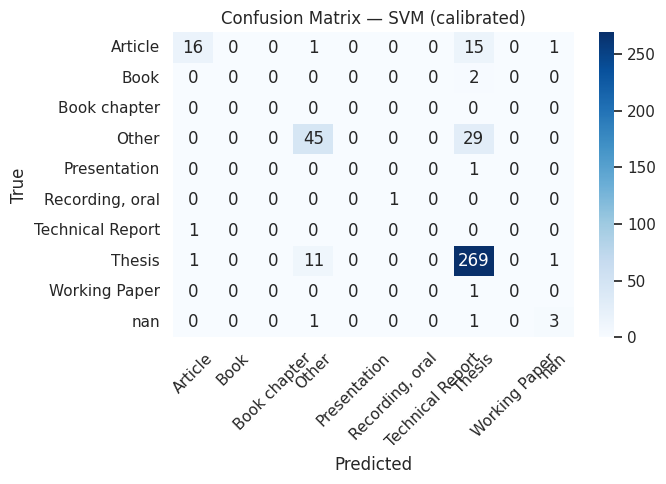


===== Naive Bayes =====
Accuracy: 0.7600 | F1-weighted: 0.6872
                  precision    recall  f1-score   support

         Article     0.0000    0.0000    0.0000        33
            Book     0.0000    0.0000    0.0000         2
           Other     1.0000    0.2973    0.4583        74
    Presentation     0.0000    0.0000    0.0000         1
 Recording, oral     0.0000    0.0000    0.0000         1
Technical Report     0.0000    0.0000    0.0000         1
          Thesis     0.7460    1.0000    0.8545       282
   Working Paper     0.0000    0.0000    0.0000         1
             nan     0.0000    0.0000    0.0000         5

        accuracy                         0.7600       400
       macro avg     0.1940    0.1441    0.1459       400
    weighted avg     0.7110    0.7600    0.6872       400



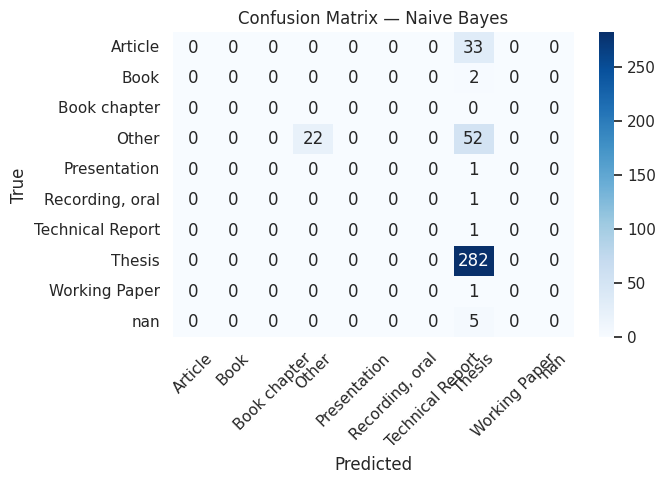


===== Logistic Regression =====
Accuracy: 0.7975 | F1-weighted: 0.7530
                  precision    recall  f1-score   support

         Article     0.8889    0.2424    0.3810        33
            Book     0.0000    0.0000    0.0000         2
           Other     1.0000    0.3919    0.5631        74
    Presentation     0.0000    0.0000    0.0000         1
 Recording, oral     0.0000    0.0000    0.0000         1
Technical Report     0.0000    0.0000    0.0000         1
          Thesis     0.7790    1.0000    0.8758       282
   Working Paper     0.0000    0.0000    0.0000         1
             nan     0.0000    0.0000    0.0000         5

        accuracy                         0.7975       400
       macro avg     0.2964    0.1816    0.2022       400
    weighted avg     0.8075    0.7975    0.7530       400



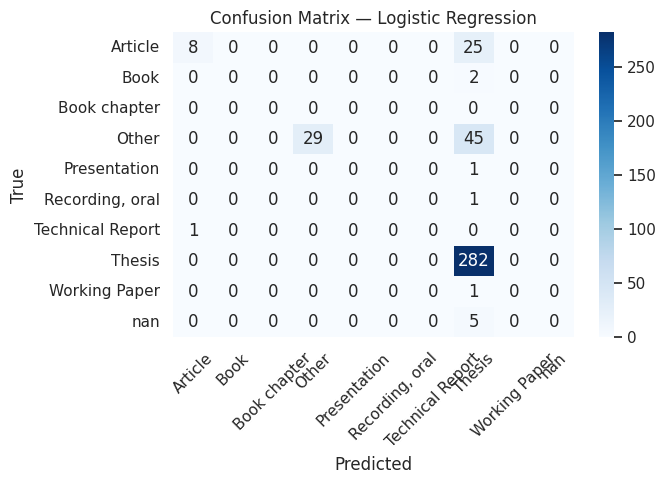


===== Random Forest =====
Accuracy: 0.8375 | F1-weighted: 0.8191
                  precision    recall  f1-score   support

         Article     0.9565    0.6667    0.7857        33
            Book     0.0000    0.0000    0.0000         2
           Other     1.0000    0.4189    0.5905        74
    Presentation     0.0000    0.0000    0.0000         1
 Recording, oral     1.0000    1.0000    1.0000         1
Technical Report     0.0000    0.0000    0.0000         1
          Thesis     0.8373    0.9858    0.9055       282
   Working Paper     0.0000    0.0000    0.0000         1
             nan     0.2308    0.6000    0.3333         5

        accuracy                         0.8375       400
       macro avg     0.4472    0.4079    0.4017       400
    weighted avg     0.8596    0.8375    0.8191       400



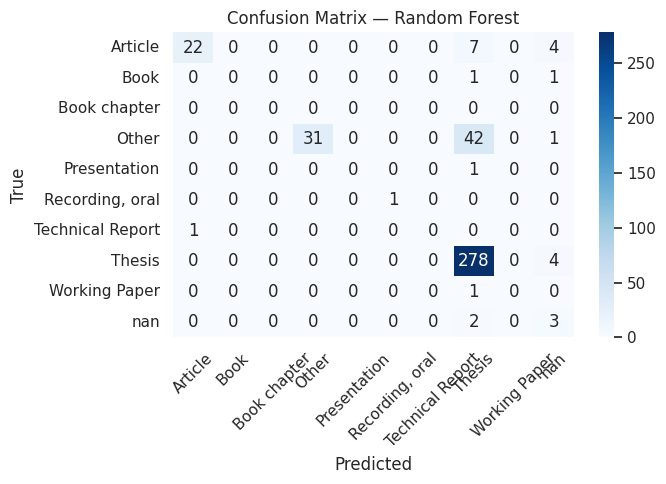

,accuracy,f1_weighted
model,,
SVM (calibrated),0.8350,0.820051
Random Forest,0.8375,0.819130
Logistic Regression,0.7975,0.753026
Naive Bayes,0.7600,0.687246


In [26]:
# =============================
# Cell 3 — Evaluation (reports + confusion matrices + performance table)
# =============================
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

perf = []

for name, clf in trained_models.items():
    y_pred = clf.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, average="weighted")
    perf.append({"model": name, "accuracy": acc, "f1_weighted": f1})
    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc:.4f} | F1-weighted: {f1:.4f}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion matrix
    labels = np.unique(np.concatenate([y_test.unique(), clf.classes_]))
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

perf_df = pd.DataFrame(perf).set_index("model").sort_values("f1_weighted", ascending=False)
display(perf_df)


In [27]:
# =============================
# Cell 4 — Save best model & vectorizer
# =============================
import joblib, os

deploy_dir = os.path.join(project_dir, "deployment")
os.makedirs(deploy_dir, exist_ok=True)

best_name = perf_df["f1_weighted"].idxmax()
best_model = trained_models[best_name]

model_path = os.path.join(deploy_dir, f"{best_name.replace(' ','_').lower()}_model.joblib")
vec_path   = os.path.join(deploy_dir, "tfidf_vectorizer.joblib")

joblib.dump(best_model, model_path)
joblib.dump(vectorizer, vec_path)

print("Saved best model:", best_name)
print("model_path:", model_path)
print("vec_path:", vec_path)


Saved best model: SVM (calibrated)
model_path: /content/drive/MyDrive/misc-unza25-csc4792-project_team30/deployment/svm_(calibrated)_model.joblib
vec_path: /content/drive/MyDrive/misc-unza25-csc4792-project_team30/deployment/tfidf_vectorizer.joblib


In [ ]:
# =============================
# Deployment – Classify References from PDF Bitstreams
# =============================
import fitz  # PyMuPDF (better than PyPDF2 for text extraction)
import re

def extract_references_from_pdf(pdf_path):
    """
    Extracts candidate references from a PDF file by finding
    the References/Bibliography section and splitting lines.
    """
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text("text")
    doc.close()

    # Try to locate 'References' or 'Bibliography' section
    refs_start = re.search(r"(References|Bibliography)", text, re.IGNORECASE)
    if refs_start:
        text = text[refs_start.start():]

    # Split into lines and filter out too-short entries
    references = [line.strip() for line in text.split("\n") if len(line.strip()) > 30]
    return references


def classify_references_from_pdf(pdf_path, vectorizer, model):
    """
    End-to-end: extract references from a PDF,
    transform with trained vectorizer, and classify with model.
    """
    refs = extract_references_from_pdf(pdf_path)
    if not refs:
        print("⚠️ No references found in the PDF.")
        return []

    X_new = vectorizer.transform(refs)
    preds = model.predict(X_new)
    return list(zip(refs, preds))


# =============================
# Example Deployment Test
# =============================

# Pick a trained model (e.g., Logistic Regression, SVM, Random Forest, etc.)
deployed_model = trained_models["Logistic Regression"]

# Path to a sample PDF (replace with IR bitstream path)
pdf_path = "/content/sample_reference_paper.pdf"

results = classify_references_from_pdf(pdf_path, vectorizer, deployed_model)

# Show predictions
for ref, pred in results[:10]:  # show first 10 for brevity
    print(f"📄 Reference: {ref}\n → Predicted Type: {pred}\n")
